In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [3]:
os.getcwd()

'/home/utkarsh/fila/code'

In [4]:
resultDir = os.getcwd() + '/results'

In [5]:
algos = os.listdir(resultDir)
count = 0

In [6]:
for algo in algos:
    algodir = resultDir + '/' + algo
    for file in os.listdir(algodir):
        try:
            if len(open(algodir + '/' + file ).readlines()) != 7:
                print("file", file, algo)
            else:
                count+=1
        except Exception as e:
            print(file, e)
    print(algo, count)
    count = 0

sarsa 1100
ql 100


In [7]:
def getTotalAward(filename):
    t = open(filename).readlines()[2]
#     print(t)
    t = t.strip().split()
#     print(t)
    return int(t[2])

In [8]:
getTotalAward('./results/sarsa/instance_0_accum_lambda_0.0_rs_0.txt')

-104795

In [9]:
fs = 'instance_0_accum_lambda_0.0_rs_0.txt'
fq = 'instance_1_gamma_0.95_rs_25.txt'
def getVarfromFile(f, algo='sarsa'):
    if algo == 'sarsa':
        f = f[:-4].strip().split('_')
        instance = int(f[1])
        rs = int(f[-1])
        return int(f[1]), float(f[4]), int(f[-1])
    elif algo == 'ql':
        f = f[:-4].strip().split('_')
        instance = int(f[1])
        rs = int(f[-1])
        return int(f[1]), int(f[-1])       
    else:
        print("Invalid algo")

In [10]:
getVarfromFile(fq, 'ql')

(1, 25)

In [11]:
data = np.zeros((2, 11, 50))

In [12]:
data.shape


(2, 11, 50)

In [13]:
algo='sarsa' # algos[0]
algodir = resultDir + '/' + algo
for file in os.listdir(algodir):
    try:
        instance, lamb, rs = getVarfromFile(file)
        totalReward = getTotalAward(algodir + '/' + file)
        data[instance][int(lamb*10)][rs]=totalReward
        count+=1
    except Exception as e:
        pass
        print(file, e)
print(algo, count)


sarsa 1100


In [14]:
averageReward = data.sum(axis=2)/50

In [15]:
averageReward.shape

(2, 11)

In [16]:
averageReward

array([[-101122.26,  -87041.02,  -76533.84,  -66227.64,  -55396.22,
         -47690.84,  -37630.8 ,  -28744.78,  -22790.4 ,  -16570.16,
         -54011.9 ],
       [  -3074.38,    6759.  ,   13439.14,   17265.56,   21748.22,
          23995.8 ,   27920.02,   29736.26,   32031.82,   32951.92,
          29261.18]])

In [17]:
lambdas = np.linspace(0.0, 1.0, 11)


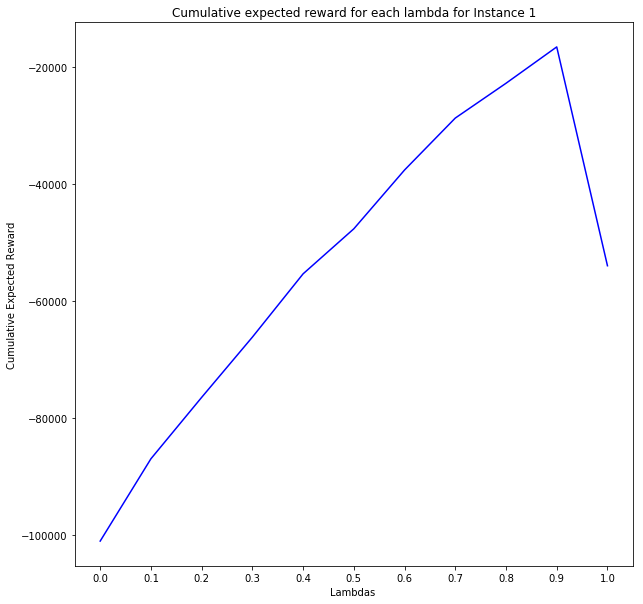

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(lambdas[:], averageReward[0][:], 'b', label='Instance 0')
# ax.plot(lambdas[:], averageReward[1][:], 'g', label='Instance 1')
ax.set_xticks(lambdas)
ax.set_xlabel('Lambdas ')
ax.set_ylabel('Cumulative Expected Reward')
# ax.legend(['Instance 0'])
ax.set_title('Cumulative expected reward for each lambda for Instance 1')
plt.show()

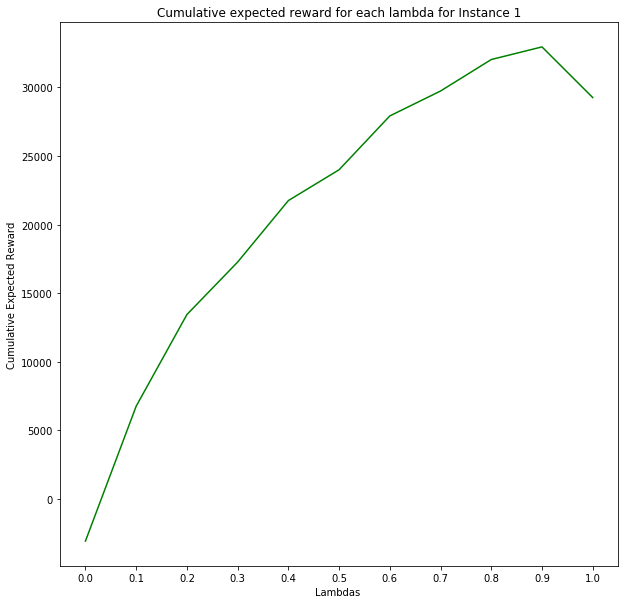

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
# ax.plot(lambdas[:], averageReward[1][:], 'r', label='Instance 1')
ax.plot(lambdas[:], averageReward[1][:], 'g', label='Instance 1')
ax.set_xticks(lambdas)
ax.set_xlabel('Lambdas ')
ax.set_ylabel('Cumulative Expected Reward')
# ax.legend(['Instance 1'])
ax.set_title('Cumulative expected reward for each lambda for Instance 1')
plt.show()

In [23]:
best_lambda = 0.9
sarsa_best_files = [x for x in os.listdir(resultDir + '/' + 'sarsa') if ('lambda_' + str(best_lambda)) in x ]
ql_best_files = [x for x in os.listdir(resultDir + '/' + 'ql')]

In [24]:
len(sarsa_best_files)

100

In [25]:
len(ql_best_files)

100

In [26]:
np.array([1, 2], dtype=float)

array([ 1.,  2.])

In [27]:
def getPerEpisodeRewards(file):
    f = open(file).readlines()[1]

In [28]:
data_sarsa = np.zeros((2, 50, 500))
data_ql = np.zeros((2, 50, 500))

In [29]:
for file in sarsa_best_files:
    rewards = list(map(int, open(resultDir + '/sarsa/' + file).readlines()[1].strip()[1:-1].split(', ')))
    instance,_, rs = getVarfromFile(file, 'sarsa')
    data_sarsa[instance][rs] = np.array(rewards, dtype=float)

In [30]:
for file in ql_best_files:
    rewards = list(map(int, open(resultDir + '/ql/' + file).readlines()[1].strip()[1:-1].split(', ')))
    instance, rs = getVarfromFile(file, algo='ql')
    data_ql[instance][rs] = np.array(rewards, dtype=float)

In [31]:
data_ql = data_ql.mean(axis=1)

In [33]:
data_sarsa = data_sarsa.mean(axis=1)

In [35]:
episodes = list(range(1, 501))

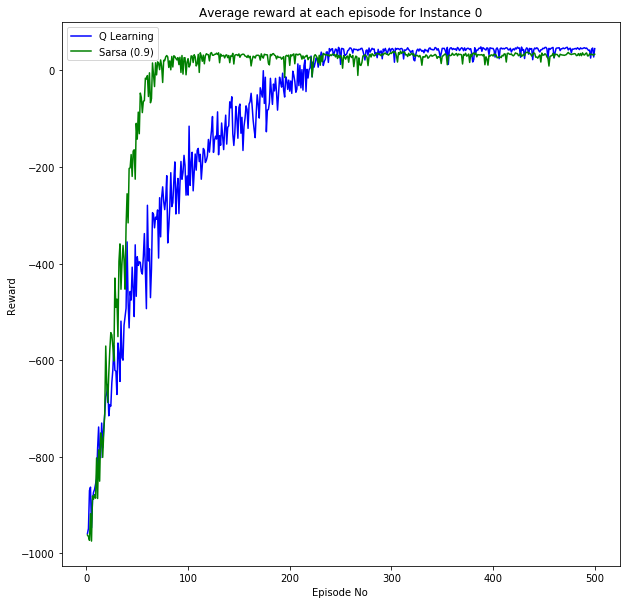

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(episodes, data_ql[0], 'b', label='Q Learning')
ax.plot(episodes, data_sarsa[0], 'g', label='Sarsa')
ax.set_xlabel('Episode No ')
ax.set_ylabel('Reward')
ax.legend(['Q Learning', 'Sarsa (' + str(best_lambda) +')'])
ax.set_title('Average reward at each episode for Instance 0')
plt.show()

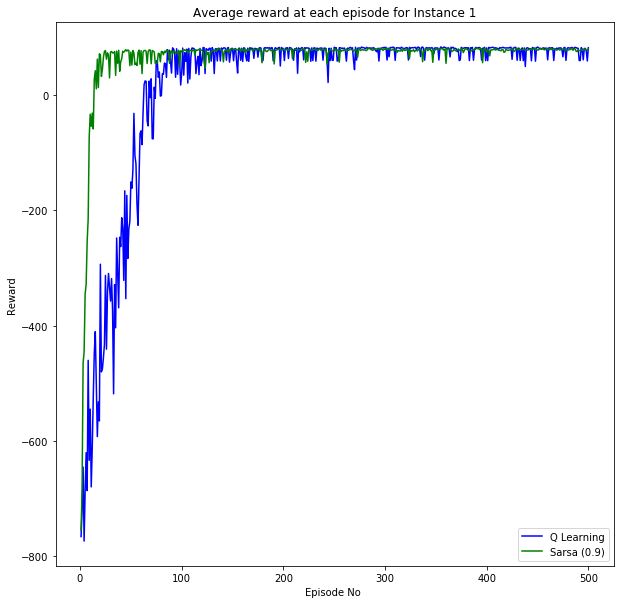

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(episodes, data_ql[1], 'b', label='Q Learning')
ax.plot(episodes, data_sarsa[1], 'g', label='Sarsa')
ax.set_xlabel('Episode No ')
ax.set_ylabel('Reward')
ax.legend(['Q Learning', 'Sarsa (' + str(best_lambda) +')'])
ax.set_title('Average reward at each episode for Instance 1')
plt.show()